In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = "./data/"
users = pd.read_csv(path+"BX-Users.csv", on_bad_lines='skip', sep=';', encoding='latin')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
# Books data
books = pd.read_csv(path+"BX-Books.csv", on_bad_lines='skip', sep=';', encoding='latin')
books.head()

/tmp/ipykernel_9248/2061456030.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path+"BX-Books.csv", on_bad_lines='skip', sep=';', encoding='latin')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Ratings data
ratings = pd.read_csv(path+"BX-Book-Ratings.csv", on_bad_lines='skip', sep=';', encoding='latin')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# Dimension of dataset
print(f'''\tBook_df shape is {books.shape}
        Ratings_df shape is {ratings.shape}
        Users_df shape is {users.shape}''')

	Book_df shape is (271360, 8)
        Ratings_df shape is (1149780, 3)
        Users_df shape is (278858, 3)


## Users dataset

In [6]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users.isnull().sum()
# We get 110762 NaN value

User-ID          0
Location         0
Age         110762
dtype: int64

/tmp/ipykernel_9248/3551174146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


<AxesSubplot:xlabel='Age', ylabel='Density'>

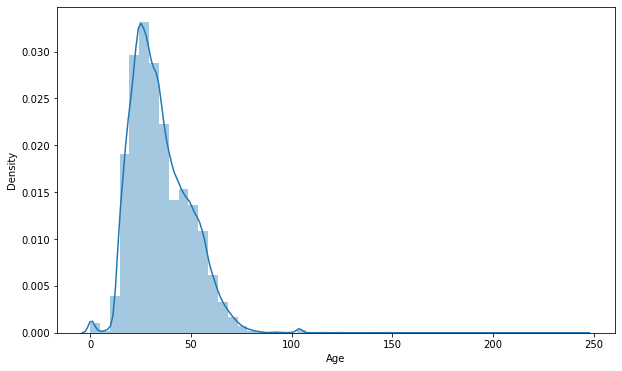

In [10]:
plt.figure(figsize=(10, 6))
sns.distplot(users.Age)

### Location

In [9]:
for i in users:
    users['Country'] = users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [10]:
user_country = users.groupby('Country')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False).head(10)
user_country

,Country,User-ID
490,usa,139712
89,canada,21658
478,united kingdom,18556
185,germany,17073
429,spain,13258
34,australia,11785
230,italy,11271
0,,4588
175,france,3487
374,portugal,3390


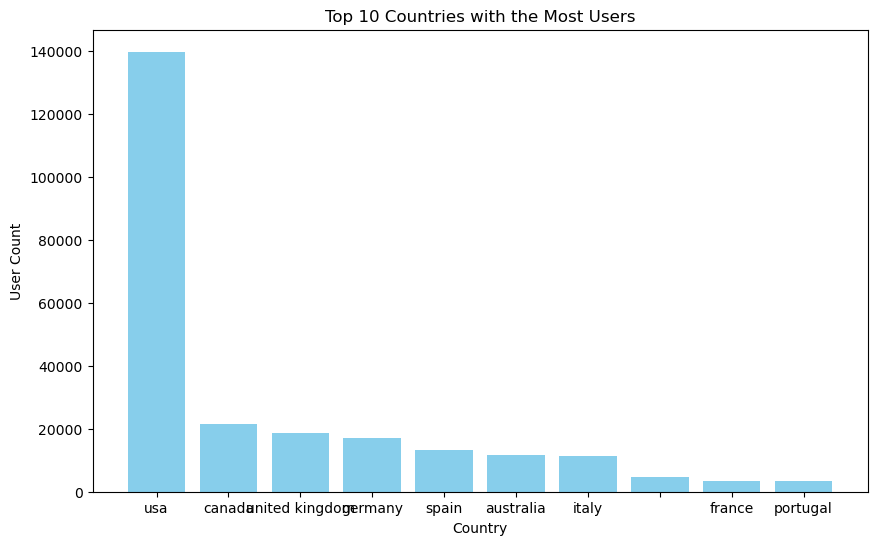

In [11]:
# Plot top 10 countries have highest users
plt.figure(figsize=(10, 6))
plt.bar(user_country['Country'], user_country['User-ID'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('User Count')
plt.title('Top 10 Countries with the Most Users')
plt.show()

## Book Dataset

In [12]:
# top 10 Publisher
top_publishers = books.groupby('Publisher')['ISBN'].count().reset_index().sort_values(by='ISBN', ascending=False).head(10)
top_publishers

,Publisher,ISBN
6583,Harlequin,7535
13667,Silhouette,4220
11762,Pocket,3905
1391,Ballantine Books,3783
1421,Bantam Books,3646
13259,Scholastic,3160
13712,Simon &amp; Schuster,2971
11390,Penguin Books,2844
1717,Berkley Publishing Group,2771
15931,Warner Books,2727


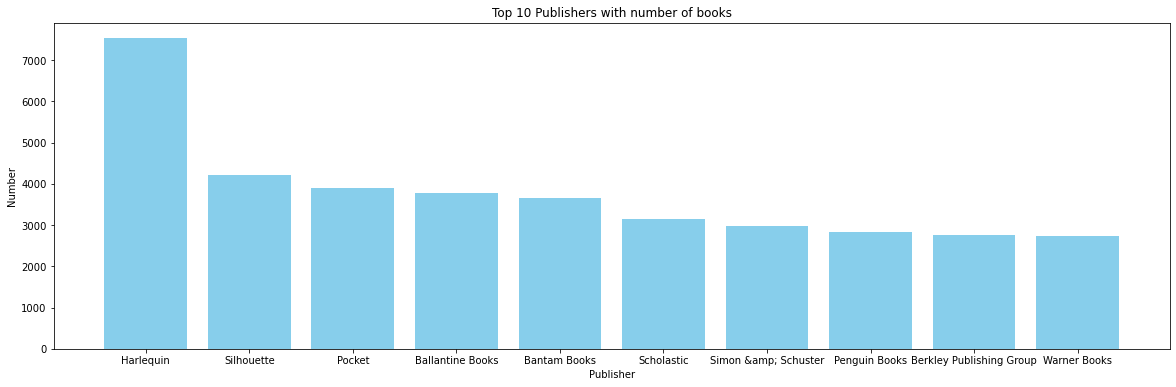

In [15]:
# Plot top 10 countries have highest users
plt.figure(figsize=(20, 6))
plt.bar(top_publishers['Publisher'], top_publishers['ISBN'], color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number')
plt.title('Top 10 Publishers with number of books')
plt.show()

In [16]:
# Top 10 Book Authors
top_book_authors = books.groupby('Book-Author')['ISBN'].count().reset_index().sort_values(by='ISBN', ascending=False).head(10)
top_book_authors

,Book-Author,ISBN
1088,Agatha Christie,632
100924,William Shakespeare,567
91189,Stephen King,524
4567,Ann M. Martin,423
13497,Carolyn Keene,373
30559,Francine Pascal,372
40000,Isaac Asimov,330
73343,Nora Roberts,315
7311,Barbara Cartland,307
14422,Charles Dickens,302


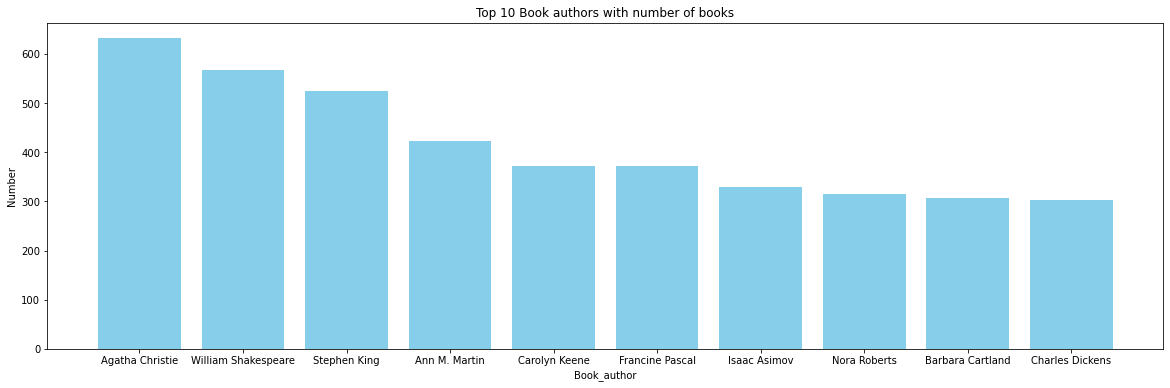

In [18]:
# Plot top 10 book authors have most books
plt.figure(figsize=(20, 6))
plt.bar(top_book_authors['Book-Author'], top_book_authors['ISBN'], color='skyblue')
plt.xlabel('Book_author')
plt.ylabel('Number')
plt.title('Top 10 Book authors with number of books')
plt.show()

## Ratings dataset

In [20]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


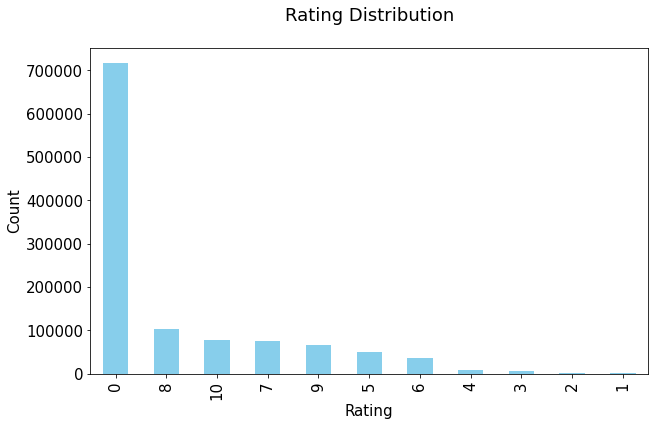

In [24]:
# Rating distribution
plt.figure(figsize=(10, 6))
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=True).plot(kind="bar",color='skyblue')
plt.title("Rating Distribution\n")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## Data Cleaning

In [25]:
# Year-Of-Publication has some solumns mismatched
# ISBN = '0789466953'
books.loc[books.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953', 'Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953', 'Book-Title'] = "DK Reader: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

# ISBN = '078946697X'
books.loc[books.ISBN == '078946697X', 'Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X', 'Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X', 'Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X', 'Book-Title'] = "DK Reader: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

# rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X')] 


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Reader: Creating the X-Men, How It All Bega...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Reader: Creating the X-Men, How Comic Books...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [26]:
# Year-Of-Publication
books.loc[(books['Year-Of-Publication'] == 'Gallimard'), 'Year-Of-Publication'] = np.NAN
books.loc[(books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN
# replace NAN with median value
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [27]:
users.head(2)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa


In [28]:
# Age
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [29]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

/tmp/ipykernel_9248/3278320818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


<AxesSubplot:xlabel='Age', ylabel='Density'>

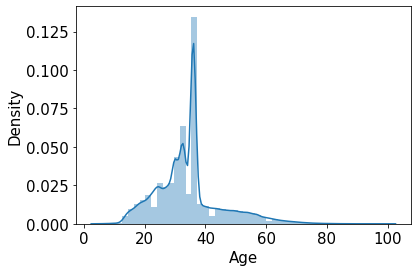

In [30]:
sns.distplot(users.Age)

In [31]:
# ratings
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [33]:
index_to_drop = ratings[ratings['Book-Rating'] == 0].index
ratings = ratings.drop(index_to_drop)

In [34]:
ratings.shape

(433671, 3)

In [35]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3


In [36]:
ratings = ratings.rename(columns={'User-ID':'user_id', 'Book-Rating': 'rating'})
ratings.head(2)

,user_id,ISBN,rating
1,276726,0155061224,5
3,276729,052165615X,3


In [37]:
users.head(1)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",36.0,usa


In [38]:
users = users.rename(columns={'User-ID':'user_id', 'Location': 'location', 'Age':'age', 'Country':'country'})
users.head(2)

,user_id,location,age,country
0,1,"nyc, new york, usa",36.0,usa
1,2,"stockton, california, usa",18.0,usa


In [39]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [40]:
books = books.rename(columns={'Book-Title':'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher'})
books.head(2)

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


## Remove some data

In [41]:
ratings.shape

(433671, 3)

In [42]:
ratings.user_id.value_counts()

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
114079       1
114081       1
114096       1
114115       1
276723       1
Name: user_id, Length: 77805, dtype: int64

In [50]:
x = ratings['user_id'].value_counts() > 150

In [51]:
y = x[x].index

In [52]:
ratings = ratings[ratings['user_id'].isin(y)]

In [53]:
ratings.shape

(87812, 3)

In [54]:
ratings.to_csv('./data/cleaned_ratings.csv')
users.to_csv('./data/cleaned_users.csv')
books.to_csv('./data/cleaned_books.csv')

## Store data to MINIO

In [8]:
from minio import Minio

client = Minio("localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

    # The file to upload, change this path if needed
source_file = ['./data/cleaned_books.csv',
               './data/cleaned_users.csv',
               './data/cleaned_ratings.csv']

# The destination bucket and filename on the MinIO server
bucket_name = "data-for-recommend"


# Make the bucket if it doesn't exist.
found = client.bucket_exists(bucket_name)
if not found:
    client.make_bucket(bucket_name)
    print("Created bucket", bucket_name)
else:
    print("Bucket", bucket_name, "already exists")

# Upload the file, renaming it in the process
for file in source_file:
    destination_file = "data/{}".format(file[7:])
    client.fput_object(
        bucket_name, destination_file, file,
    )
    print(
        source_file, "successfully uploaded as object",
        destination_file, "to bucket", bucket_name,
    )

Bucket data-for-recommend already exists


S3Error: S3 operation failed; code: XMinioInvalidObjectName, message: Object name contains unsupported characters., resource: /data-for-recommend/dat/, request_id: 17A95E4830D18DD4, host_id: dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8, bucket_name: data-for-recommend, object_name: dat/

In [80]:
import requests
print(requests.certs.where())

/etc/ssl/certs/ca-certificates.crt
